In [1]:
from pandas import DataFrame
import pandas as pd
import seaborn as sns
import numpy as np
import random

import matplotlib.pyplot as plt
% matplotlib inline

import csv

import os

## DATASET STATISTICS

In [ ]:
# this block of codes copied from preprocessing.ipynb
os.chdir('/..')

import glob

Myfiles = [f for f in glob.glob('*.gz')]
Myfiles.sort()

df = []

for files in Myfiles:
    file = pd.read_csv(files, sep=' ',header=None)
    df.append(file)

files_concat = pd.concat(df[:50],  ignore_index=True)
files_concat = files_concat[[3,7]]
files_concat.columns = ['summary', 'text']

word_text = []
word_summary = []
for i in range(len(files_concat)):
  word_text.append(len(files_concat['text'][i].split()))
  word_summary.append(len(files_concat['summary'][i].split()))


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

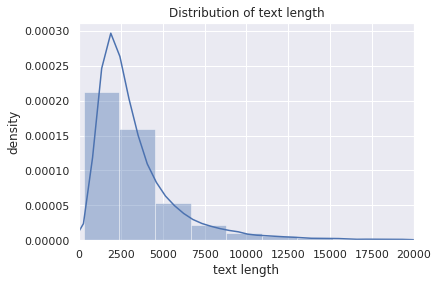

In [ ]:
sns.set_theme()
plt.xlabel('text length')
plt.ylabel('density')
plt.title('Distribution of text length')
plt.xlim(0, 20000)
sns.distplot(word_text)
plt.show

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

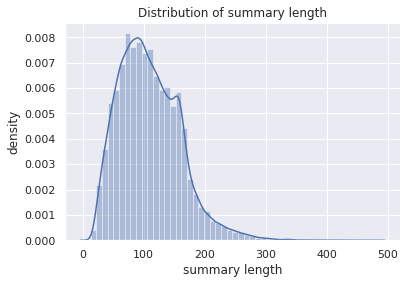

In [ ]:
sns.set_theme()
plt.xlabel('summary length')
plt.ylabel('density')
plt.title('Distribution of summary length')
sns.distplot(word_summary)
plt.show

In [ ]:
# this block of codes copied from preprocessing.ipynb
# include only texts with text_length <= 4000 and summary_length <=200
index_list = []
count_text_list = []
count_summary_list = []

for i in range(len(files_concat)):
  count_text = len(files_concat['text'][i].split())
  count_summary = len(files_concat['summary'][i].split())
  if  count_text <= 4000 and count_summary <=200:
    index_list.append(i)
    count_text_list.append(count_text)
    count_summary_list.append(count_summary)

df = files_concat.iloc[index_list]
df.reset_index(inplace = True) 
df_ = df[:5000]

In [ ]:
len(index_list)

In [ ]:
count = {'text': count_text_list[:5000],
        'summary': count_summary_list[:5000],
        }

df = DataFrame(count, columns= ['text','summary'])
df

      text  summary
0     2351      174
1     1812      121
2     2075      135
3     1438      111
4     1787      152
...    ...      ...
4995  1722      101
4996  2914      172
4997  2797      177
4998  2834       90
4999  2406       29

[5000 rows x 2 columns]


In [ ]:
# descriptive statistics 
df[['text','summary']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
text,5000.0,2170.4950,828.006840,353.0,1536.75,2075.0,2753.0,4000.0
summary,5000.0,102.6106,41.343314,20.0,70.00,100.0,134.0,200.0


## TRAINING LOSS



In [ ]:
def training_loss(loss_list1, loss_list2, loss_list3, epochs):
  """ draw all losses of model with different epochs in the same graph """

  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.title('Training Loss--GPT2, T5, BART')
  plt.plot(range(1, epochs+1), loss_list1, marker='o', label='GPT2')
  plt.plot(range(1, epochs+1), loss_list2, marker='*', label='T5')
  plt.plot(range(1, epochs+1), loss_list3, marker='d', label='BART')
  plt.legend()

  plt.show


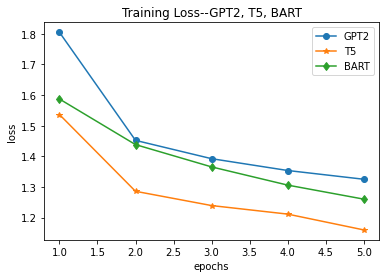

In [ ]:
# insert all losses acquired in separable .ipynbs here
loss_list1=[1.8047910928726196, 1.4520124197006226,1.3922662734985352,1.3537217378616333,1.3251632452011108]
loss_list2=[1.5363706350326538,1.2858837842941284,1.2393345832824707,1.2114567756652832,1.15988290309906]
loss_list3=[1.5870323181152344,1.4382187128067017,1.3654522895812988,1.3060634136199951,1.2602858543395996]

training_loss(loss_list1, loss_list2, loss_list3, epochs=5)

## ROUGE-SCORE DISTRIBUTION

        GPT-2        T5      BART      BERT
0    0.258427  0.183908  0.134831  0.235955
1    0.098765  0.112957  0.092593  0.061728
2    0.098361  0.091503  0.180328  0.000000
3    0.215054  0.177778  0.193548  0.204301
4    0.000000  0.024845  0.014706  0.014706
..        ...       ...       ...       ...
495  0.078947  0.086957  0.210526  0.078947
496  0.157534  0.092827  0.164384  0.061644
497  0.015385  0.014184  0.076923  0.046154
498  0.170543  0.057692  0.093023  0.046512
499  0.291667  0.309091  0.300000  0.166667

[500 rows x 4 columns]


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

Text(0, 0.5, 'Density')

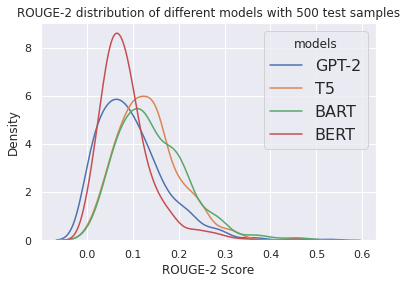

In [ ]:
# Rouge-2 distribution

# List of models to plot
models = ['GPT-2', 'T5', 'BART', 'BERT']

dic = {'GPT-2': pd.read_csv('rouge_gpt2.csv', header=0)['rouge2'],
        'T5': pd.read_csv('rouge_t5.csv', header=0)['rouge2'],
         'BART':pd.read_csv('rouge_bart.csv', header=0)['rouge2'],
       'BERT':pd.read_csv('rouge_bert.csv', header=0)['rouge2'],
        }

df = DataFrame(dic, columns= models)
print (df)

# Iterate through the models
for i in range(len(models)):    
    # Draw the density plot
    sns.distplot(df.iloc[:, i], hist = False, 
                 label = models[i])
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'models')
plt.title('ROUGE-2 distribution of different models with 500 test samples')
plt.xlabel('ROUGE-2 Score')
plt.ylabel('Density')

## GENERATED-SUMMARY STATISTICS

In [2]:
# Avg_generated_summary_length

# GPT-2
df1 = pd.read_csv('gen_summary_gpt2.csv', header=0)['gensummary']
words1 = []
for i in range(len(df1)):
  words1.append(len(df1[i].split()))

# T5
df2 = pd.read_csv('gen_summary_t5.csv', header=0)['gensummary']
words2 = []
for i in range(len(df2)):
  words2.append(len(df2[i].split()))

# BART
df3 = pd.read_csv('gen_summary_bart.csv', header=0)['gensummary']
words3 = []
for i in range(len(df3)):
  words3.append(len(df3[i].split()))

# BERT
df4 = pd.read_csv('gen_summary_bert.csv', header=0)['gen_summary']
words4 = []
for i in range(len(df4)):
  words4.append(len(df4[i].split()))

print(f'gpt2: {np.mean(words1)}')
print(f't5: {np.mean(words2)}')
print(f'bart: {np.mean(words3)}')
print(f'bert: {np.mean(words4)}')

gpt2: 122.524
t5: 88.778
bart: 93.632
bert: 111.334
